<a href="https://colab.research.google.com/github/nv-hiep/QM/blob/main/Spherical_Harmonics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from matplotlib import cm
from skimage import color
from skimage import io
import numba
from numba import jit

from IPython.display import HTML

Remember that:

$$\frac{\partial}{\partial x} f = \frac{f_{k+1} - f_{k}}{\Delta x}$$

and

$$\frac{\partial^2}{\partial x^2} f = \frac{1}{\Delta x} [\frac{f_{k+1} - f_{k}}{\Delta x} - \frac{f_{k} - f_{k-1}}{\Delta x}] = \frac{f_{k+1} - 2f_{k} + f_{k-1}}{(\Delta x)^2}$$

The spherical harmonics are a set of special functions defined on the surface of a sphere that originate in the solution to Laplace's equation:
$$\nabla^2 f=0$$

Because they are basis functions for irreducible representations of SO(3), the group of rotations in three dimensions, they appear in many scientific domains, in particular as the angular part of the wavefunctions of atoms (atomic orbitals).

They are described in terms of an integer $degree$ $l=0,1,2,…$ and order $m=−l,−l+1,…,l$.

In quantum mechanics, l is identified with the (orbital) angular momentum quantum number, and m with the azimuthal quantum number. In this domain, they are usually defined including a factor of $(−1)^m$ (the Condon–Shortley phase convention):

$$ Y^m_l(\theta,\phi) = (-1)^m \sqrt[]{\frac{(2l+1)}{4π} \frac{(l-m)!}{(l+m)!}} P_{lm}(cos\theta) e^{im\phi}$$

where $P_{lm}(cos\theta)$ is an associated Legendre polynomial (without the factor of $(−1)^m$).

Since $Y^m_l(\theta,\phi)$ are complex functions of angle, it is often considered more convenient to use their real forms for their depiction in figures and in some calculations. A suitable real basis of spherical harmonics may be defined as:

$$ \begin{equation}
  Y_{lm}  = \left \{
  \begin{aligned}
    &\sqrt[]{2}(-1)^m Im[Y^{|m|}_l], && \text{if}\ m < 0 \\
    &Y^0_{l}, && \text{if}\ m = 0 \\
    &\sqrt[]{2}(-1)^m Re[Y^{m}_l], && \text{if}\ m > 0
  \end{aligned} \right.
\end{equation}  $$

The code below uses SciPy's special.sph_harm routine to calculate the spherical harmonics, which are then cast into these real functions and displayed in a three-dimensional Matplotlib plot.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# The following import configures Matplotlib for 3D plotting.
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
# plt.rc('text', usetex=True)

In [3]:
# Grids of polar and azimuthal angles
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)

# Create a 2-D meshgrid of (theta, phi) angles.
theta, phi = np.meshgrid(theta, phi)

# Calculate the Cartesian coordinates of each point in the mesh.
xyz = np.array([np.sin(theta) * np.sin(phi),
                np.sin(theta) * np.cos(phi),
                np.cos(theta)])

In [ ]:
def plot_Y(ax, el, m):
    """Plot the spherical harmonic of degree el and order m on Axes ax."""

    # NB In SciPy's sph_harm function the azimuthal coordinate, theta,
    # comes before the polar coordinate, phi.
    Y = sph_harm(abs(m), el, phi, theta)

    # Linear combination of Y_l,m and Y_l,-m to create the real form.
    if m < 0:
        Y = np.sqrt(2) * (-1)**m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1)**m * Y.real
    Yx, Yy, Yz = np.abs(Y) * xyz

    # Colour the plotted surface according to the sign of Y.
    cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap('PRGn'))
    cmap.set_clim(-0.5, 0.5)

    ax.plot_surface(Yx, Yy, Yz,
                    facecolors=cmap.to_rgba(Y.real),
                    rstride=2, cstride=2)

    # Draw a set of x, y, z axes for reference.
    ax_lim = 0.5
    ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)
    
    # Set the Axes limits and title, turn off the Axes frame.
    ax.set_title(r'$Y_{{{},{}}}$'.format(el, m))
    ax_lim = 0.5
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    ax.axis('off')

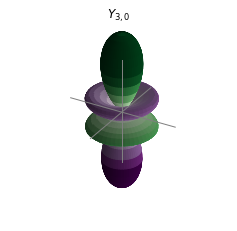

In [5]:
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(projection='3d')
l, m = 3, 0
plot_Y(ax, l, m)
# plt.savefig('Y{}_{}.png'.format(l, m))
plt.show()

0 0
1 -1
1 0
1 1
2 -2
2 -1
2 0
2 1
2 2
3 -3
3 -2
3 -1
3 0
3 1
3 2
3 3


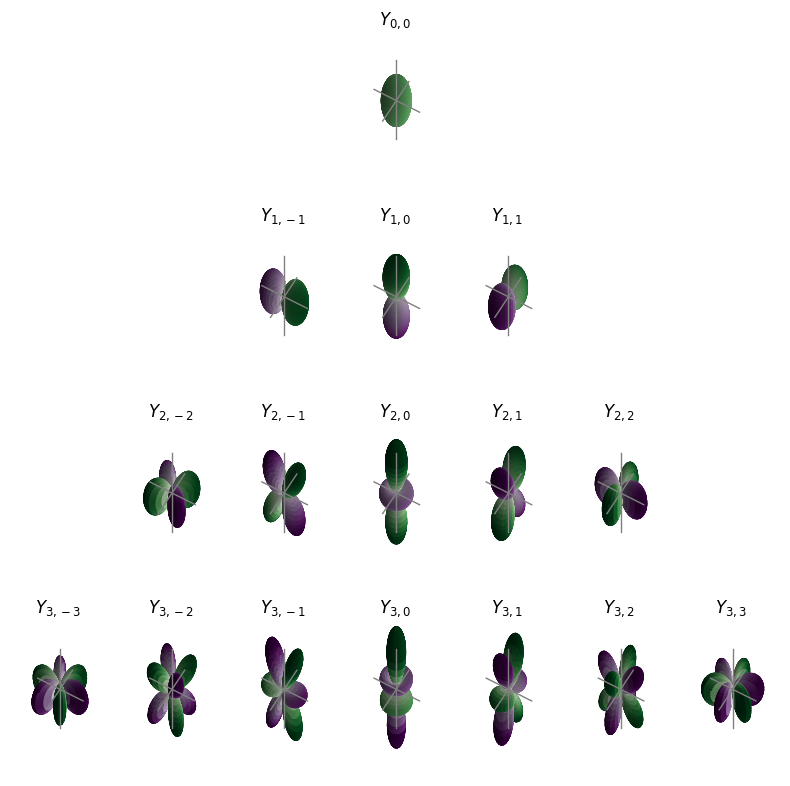

In [6]:
figsize_px, DPI = 800, 100
figsize_in = figsize_px / DPI

el_max = 3

fig = plt.figure(figsize=(figsize_in, figsize_in), dpi=DPI)
spec = gridspec.GridSpec(ncols=2*el_max+1, nrows=el_max+1, figure=fig)
for el in range(el_max+1):
    for m_el in range(-el, el+1):
        print(el, m_el)
        ax = fig.add_subplot(spec[el, m_el+el_max], projection='3d')
        plot_Y(ax, el, m_el)
plt.tight_layout()
# plt.savefig('sph_harm.png')
plt.show()